<a href="https://colab.research.google.com/github/mkitti/pandas-workshop/blob/master/Part%202%20-%20Grouping%2C%20Plotting%2C%20%26%20Merging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Grouping

The pandas `groupby` function allows us to group our data on the values in a column or column to look at summary measures for records sharing the same values.

For example, let's load the speed camera dataset again and ask which camera locations or days of the week have produced the most violations.

In [0]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nuitrcs/pandas-workshop/master/data/Speed_Camera_Violations.csv")
df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,07/08/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,07/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,07/08/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,07/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,07/27/2014,92,NaN,NaN,NaN,NaN,NaN


Now that the data is loaded, let's find the 10 locations with the most total violations recorded.

To do this, we need to group by the ADDRESS column, then examine the VIOLATIONS column of the resulting grouped dataframe.

In [0]:
# first let's group by address and look at descriptive statistics for the first 10 records
df.groupby(["ADDRESS"])["VIOLATIONS"].describe().head(10)

,count,mean,std,min,25%,50%,75%,max
ADDRESS,,,,,,,,
10318 S INDIANAPOLIS,1084.0,99.974170,39.412342,4.0,72.00,96.0,120.25,259.0
1110 S PULASKI RD,499.0,22.412826,15.078174,1.0,11.00,18.0,31.00,83.0
1111 N HUMBOLDT,1096.0,58.250000,18.067744,6.0,46.00,57.0,70.00,117.0
11144 S VINCENNES,526.0,19.612167,10.058579,1.0,12.25,18.0,25.00,75.0
11153 S VINCENNES,517.0,9.698259,5.182134,1.0,6.00,9.0,13.00,31.0
1117 S PULASKI RD,492.0,19.483740,12.954320,1.0,10.00,17.0,27.00,61.0
1142 W IRVING PARK,1091.0,84.210816,29.672455,1.0,64.00,81.0,101.00,248.0
115 N OGDEN,1094.0,41.311700,35.887579,1.0,13.00,28.0,61.00,197.0
1226 N WESTERN AVE,531.0,18.617702,15.435526,1.0,6.00,14.0,28.00,88.0


The above records aren't sorted in any meaningful way, but the first thing to note is that the Index is no longer just an integer, it is now the Address. This is because the `groupby` method returns a special object with a new index made up of the 
values of the column being grouped on.

We can still use the `loc` indexer with this new grouped object to, for example, find the count for a given address:

In [0]:
# `count` returns the number of rows for this address, not the total violation count.
# IE this tells us the number of observation (in case of our example data, Speed_Camera_Violations,
# this corresponds to the number of different days with at least one violation).
df.groupby(["ADDRESS"])["VIOLATIONS"].count().loc["19 W CHICAGO AVE"]

432

In [0]:
# to get the total violation count, we want the `sum` method:
df.groupby(["ADDRESS"])["VIOLATIONS"].sum().loc["19 W CHICAGO AVE"]

1618

In [0]:
# Now let's get the top 10 camera locations by total violation count:
df.groupby(["ADDRESS"])["VIOLATIONS"].sum().sort_values(ascending=False).head(10)

ADDRESS
4909 N CICERO AVE       220704
445 W 127TH             169337
2900 W OGDEN            139183
4124 W FOSTER AVE       127071
10318 S INDIANAPOLIS    108372
2705 W IRVING PARK      107599
1142 W IRVING PARK       91874
536 E MORGAN DR          82331
5816 W JACKSON           80174
4831 W LAWRENCE AVE      69538
Name: VIOLATIONS, dtype: int64

It's possible that some locations just have more observations than others, so a more meaningful measure is probably the mean violation count per observation. To get this we just need to use the `mean` function rather than `sum`.

In [0]:
df.groupby(["ADDRESS"])["VIOLATIONS"].mean().sort_values(ascending=False).head(10)

ADDRESS
4909 N CICERO AVE       226.595483
445 W 127TH             154.645662
2900 W OGDEN            126.876026
4124 W FOSTER AVE       120.332386
10318 S INDIANAPOLIS     99.974170
2705 W IRVING PARK       99.078269
215 E 63RD ST            84.689008
1142 W IRVING PARK       84.210816
536 E MORGAN DR          75.188128
2549 W ADDISON           73.668488
Name: VIOLATIONS, dtype: float64

How about days of the week? *When* are people most likely to be caught speeding?

The simplest way to do this is to create a new weekday column and group on that.

In [0]:
# datetime series have a special `dt` property that exposes the date/time-specific functionality.
# In this case, dayofweek is a 0-based index where 0 = Monday, 6 = Sunday.
df["VIOLATION DATE"] = pd.to_datetime(df["VIOLATION DATE"], format="%m/%d/%Y")
df["VIOLATION DATE"].dt.dayofweek.head()

0    1
1    2
2    1
3    5
4    6
Name: VIOLATION DATE, dtype: int64

In [0]:
df["DAY OF WEEK"] = df["VIOLATION DATE"].dt.dayofweek
df.groupby(["DAY OF WEEK"])["VIOLATIONS"].mean()

DAY OF WEEK
0    27.446626
1    26.745172
2    27.110899
3    28.371709
4    30.219523
5    42.380211
6    41.233922
Name: VIOLATIONS, dtype: float64

## Plotting

It's not easy to understand at a glance the distribution of speeding violations by day of the week above, so let's produce a simple plot to visualize and help understand it.

Pandas has some basic plotting functions, but I prefer how it interacts with a different visualization package called Seaborn

If you do not have seaborn, you can use pip to install it pip install seaborn

In [0]:
import seaborn as sns #The cannonical way to import seaborn

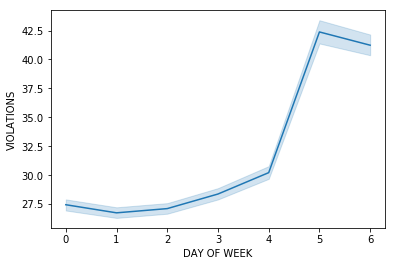

In [0]:
# The beauty of pandas with seaborn is how cleanly they interact with eachother

sns.lineplot(x = 'DAY OF WEEK', y = 'VIOLATIONS', data = df)


What if time of year is a factor here? Seaborn has a wonderful feature called hue, which allows for a quick comparison of different types of data in one graph

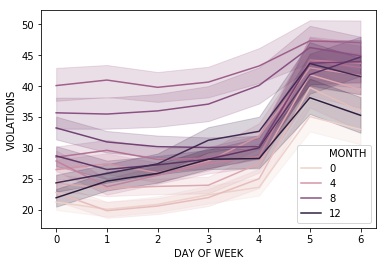

In [0]:
#first lets create a month column
df['MONTH'] = df['VIOLATION DATE'].dt.month

#then lets recreate that same plot but with the months separated out
sns.lineplot(x = 'DAY OF WEEK', y = 'VIOLATIONS', hue = 'MONTH', data = df)

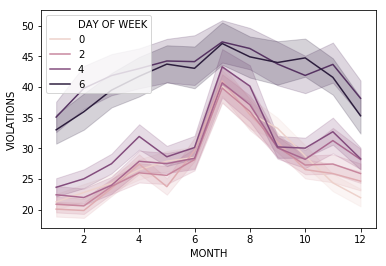

In [0]:
#thats a little chaotic, lets try flipping the hue with the x axis

sns.lineplot(x = 'MONTH', y = 'VIOLATIONS', hue = 'DAY OF WEEK', data = df)

We can continue to make this graph prettier, but I will save that for the data visualization course, this is enough to see 2 interesting trents.  First is that violations are much more likely to occur on saturday and sunday, regardless of the time of year.  The second is that that violations are much more likely to occur during the summer months.

## Combining DataFrames

Often you will need to combine data from multiple data sets together. There are three types of combinations in pandas: concatenations and merges (aka joins).

**Concatenating** means taking multiple DataFrame objects and appending their rows together to make a new DataFrame. In general you will do this when your datasets contain the same columns and you are combining observations of the same type together into one dataset that contains all the rows from all the datasets.

**Merging** is joining DataFrames together SQL-style by using common values. This is useful when you have multiple datasets with common keys and you want to combine them into one dataset that contains columns from all the datasets being merged.

In [0]:
# Concatenation example
df1 = pd.DataFrame({'Site': [1, 2, 3],
                    'Observed Value': [8.1, 5.5, 6.9]})

df2 = pd.DataFrame({'Site': [7, 8, 9],
                    'Observed Value': [10.5, 11.5, 12.0]})

print("df1: ")
print(df1)
print()
print("df2: ")
print(df2)
print()
print("concatenated along rows: ")
print(pd.concat([df1, df2]))
print()
print("concatenated along columns: ")
print(pd.concat([df1, df2], axis = 1))


df1: 
   Site  Observed Value
0     1             8.1
1     2             5.5
2     3             6.9

df2: 
   Site  Observed Value
0     7            10.5
1     8            11.5
2     9            12.0

concatenated along rows: 
   Site  Observed Value
0     1             8.1
1     2             5.5
2     3             6.9
0     7            10.5
1     8            11.5
2     9            12.0

concatenated along columns: 
   Site  Observed Value  Site  Observed Value
0     1             8.1     7            10.5
1     2             5.5     8            11.5
2     3             6.9     9            12.0


In [0]:
# Merge example
df1 = pd.DataFrame({'Site': [3, 1, 2],
                    'Observed Value': [8.1, 5.5, 6.9]})

df2 = pd.DataFrame({'Site': [1, 2, 3, 4],
                    'Temperature': [27.1, 18.2, 29.8, 30.4]})

print("df1: ")
print(df1)
print()
print("df2: ")
print(df2)
print()
print("merged: ")
print(pd.merge(df1, df2))

df1: 
   Site  Observed Value
0     3             8.1
1     1             5.5
2     2             6.9

df2: 
   Site  Temperature
0     1         27.1
1     2         18.2
2     3         29.8
3     4         30.4

merged: 
   Site  Observed Value  Temperature
0     3             8.1         29.8
1     1             5.5         27.1
2     2             6.9         18.2


In [0]:
print("df1: ")
print(df1)
print()
print("df2: ")
print(df2)
print()
print("merged: ")
print(pd.merge(df1, df2, how = 'outer'))

df1: 
   Site  Observed Value
0     3             8.1
1     1             5.5
2     2             6.9

df2: 
   Site  Temperature
0     1         27.1
1     2         18.2
2     3         29.8
3     4         30.4

merged: 
   Site  Observed Value  Temperature
0     3             8.1         29.8
1     1             5.5         27.1
2     2             6.9         18.2
3     4             NaN         30.4


## Mapping and Applying

As we have already seen, there are some basic ways to create a new column based on existing columns.  But what if we have a more complicated function? For that, pandas provides the `map` and the `apply` functions

In [0]:
#Mapping is commonly used to apply a dictionary of values to a column. 
#for instance lets take our lakes dataframe from before


lakes_data = [['erie', 64, 19],
            ['huron', 229, 59],
            ['michigan', 281, 85],
            ['ontario', 244, 86],
            ['superior', 406, 149]]

lakes = pd.DataFrame(lakes_data, columns = ['lake', 'Max Depth (m)', 'Avg Depth (m)'])
lakes

,lake,Max Depth (m),Avg Depth (m)
0,erie,64,19
1,huron,229,59
2,michigan,281,85
3,ontario,244,86
4,superior,406,149


In [0]:
#lets say I want to shorten the lake names

short_lake_dict = {'erie': 'ER',
                  'huron': 'HUR',
                  'michigan': 'MIC',
                  'ontario': 'ONT',
                  'superior': 'SUP'}

lakes.lake = lakes.lake.map(short_lake_dict)
lakes

,lake,Max Depth (m),Avg Depth (m)
0,ER,64,19
1,HUR,229,59
2,MIC,281,85
3,ONT,244,86
4,SUP,406,149


But what if you want to do something more complicated than a dictionary? that is where the `apply` function comes into play.

In [0]:
#first lets create a fake function to apply to our dataframe
#lets say on some lakes we care about the average depth, while for others we care about max depth 
def lake_specific_stats(lake, m, a):
    if lake in ['ER', 'MIC']:
        return m
    else:
        return a
    
#we will want to make a new column that captures the data (average or max depth) that we care about

lakes['max/ave'] = lakes.apply(lambda x: lake_specific_stats(x.lake, x['Max Depth (m)'], x['Avg Depth (m)']), axis = 1)
lakes


,lake,Max Depth (m),Avg Depth (m),max/ave
0,ER,64,19,64
1,HUR,229,59,59
2,MIC,281,85,281
3,ONT,244,86,86
4,SUP,406,149,149
